In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
addrs = pd.read_csv('addresses.csv', sep='\t', dtype=str, encoding='utf-8')

In [3]:
addrs.head(4)

,addresses.barcode,addresses.index,addresses.rcpn,addresses.city,addresses.street,addresses.house,addresses.letter,addresses.slash,addresses.corpus,addresses.building,addresses.room
0,10100089798038,107014,NaN,МОСКВА Г.,ПОПОВ ПРОЕЗД,4,NaN,NaN,NaN,NaN,5 КВ.
1,10176701022522,404110,Шайкина Елена Николаевна(49755),ВОЛЖСКИЙ,Космонавтов,16,б,NaN,NaN,NaN,15
2,10176801715089,107031,NaN,МОСКВА Г.,РОЖДЕСТВЕНКА,5/7 стр2,NaN,NaN,NaN,NaN,ком18
3,10176802455250,105005,NaN,МОСКВА Г.,БАКУНИНСКАЯ УЛ.,4 /6 СТР.1,NaN,NaN,NaN,NaN,5 КВ.


In [4]:
cities = addrs['addresses.city'].value_counts()

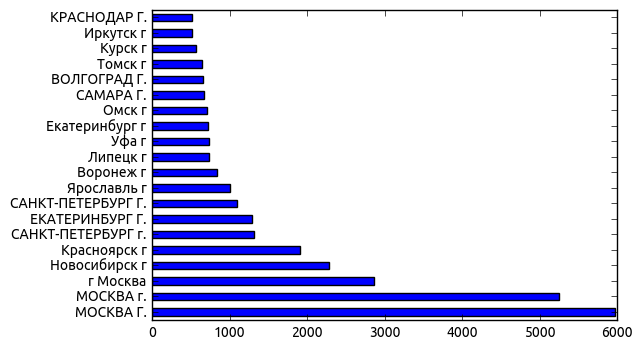

In [5]:
cities[:20].plot(kind='barh', rot=0)

In [6]:
addrs.fillna(value="", inplace=True)

In [7]:
addrs["address"] = addrs["addresses.index"].str.cat([addrs["addresses.city"], addrs["addresses.street"], addrs["addresses.house"], addrs["addresses.letter"], addrs["addresses.slash"], addrs["addresses.corpus"], addrs["addresses.building"], addrs["addresses.room"]], sep=" ")

In [8]:
clean_addrs = addrs[["addresses.barcode", "addresses.index", "addresses.rcpn", "address"]]

In [9]:
clean_addrs.head(10)

,addresses.barcode,addresses.index,addresses.rcpn,address
0,10100089798038,107014,,107014 МОСКВА Г. ПОПОВ ПРОЕЗД 4 5 КВ.
1,10176701022522,404110,Шайкина Елена Николаевна(49755),404110 ВОЛЖСКИЙ Космонавтов 16 б 15
2,10176801715089,107031,,107031 МОСКВА Г. РОЖДЕСТВЕНКА 5/7 стр2 ком18
3,10176802455250,105005,,105005 МОСКВА Г. БАКУНИНСКАЯ УЛ. 4 /6 СТР.1 ...
4,10176804245521,142117,,142117 Подольск 0 0 0 0 0 0
5,10176804631270,354395,АШИКАРЬЯН А Д,354395 Сочи 0 0 0 0 0 0
6,10178402505663,117105,Редичеву А.В.,117105 Варшавское шоссе 2
7,10178403439813,107076,БЕКЕТОВ В С,107076 МОСКВА Г. КРАСНОБОГАТЫРСКАЯ УЛ. 75 К.1 ...
8,10307096009182,400112,ВАСИЛЬЕВА Л,400112 ВОЛГОГРАД Г. ИМ. АРСЕНЬЕВА УЛ. 4 3 КВ.
9,10506404095521,141401,ЧЕЛПАНОВУ А В,141401 ХИМКИ Г. БЕРЕЗОВАЯ АЛЛЕЯ ПР. 3 161 КВ.


In [10]:
from postal.expand import expand_address
from postal.parser import parse_address

In [11]:
clean_addrs['clean_address'] = clean_addrs["address"].map(lambda a: expand_address(a)[0], na_action='ignore')

/home/ponkin/Dev/notebooks/addresses/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
clean_addrs.head(5)

,addresses.barcode,addresses.index,addresses.rcpn,address,clean_address
0,10100089798038,107014,,107014 МОСКВА Г. ПОПОВ ПРОЕЗД 4 5 КВ.,107014 москва г попов проезд 4 5 квартира
1,10176701022522,404110,Шайкина Елена Николаевна(49755),404110 ВОЛЖСКИЙ Космонавтов 16 б 15,404110 волжскии космонавтов 16 б 15
2,10176801715089,107031,,107031 МОСКВА Г. РОЖДЕСТВЕНКА 5/7 стр2 ком18,107031 москва г рождественка 5 7 стр2 ком18
3,10176802455250,105005,,105005 МОСКВА Г. БАКУНИНСКАЯ УЛ. 4 /6 СТР.1 ...,105005 москва г бакунинская улица 4 6 стр.1 5 ...
4,10176804245521,142117,,142117 Подольск 0 0 0 0 0 0,142117 подольск 0 0 0 0 0 0


In [14]:
final_addrs = clean_addrs[["addresses.barcode", "clean_address"]]

In [ ]:
final_addrs['clean_address'].value_counts()